# Calculate Saturation



This notebook consists of cells that can be used to compute saturation values from a segmented image stack. 

**Usage**: Click on the play button above and enter the relevant inputs when prompted followed by the enter key.
  
**output**: a csv file containing computed saturation values for each slice is saved in the image folder 



- author: Akin Aroge
- email: arogeakindele@gmail.com
- version: 0.1
- created: 27-04-2022

In [24]:
# do not edit
import imaging as ig
import numpy as np
import os
import pandas as pd
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = 8, 6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fill in the required inputs

In [31]:
f_dir = str(input('Enter the containing folder of the image:'))
fname = str(input("Enter the file name (including extension, e.g 'image.tiff'):"))
air_phase_val = int(input('Enter the value of the air phase pixels:'))
water_phase_val = int(input('Enter the value of the water phase pixels: '))
pixel_size = float((input('Enter pixel size of the image:')))
mea_axis = str(input("Enter the mea axis for saturation. \
                 Enter z for through-plane,\
                 x for across the plane, \
                 y for top to bottom:"))

Enter the containing folder of the image C:\Users\Yadvinder\Documents\Akin-Aroge\code\sample-files
Enter the file name (including extension, e.g 'image.tiff') sample-rois-file.tif
Enter the value of the air phase pixels 0
Enter the value of the water phase pixels  2
Enter pixel size of the image 1.54
Enter the mea axis for saturation.                  Enter z for through-plane,                 x for across the plane,                  y for top to bottom z


In [26]:
# f_dir = r'C:\Users\Yadvinder\Documents\Akin-Aroge\code\sample-files'
# fname = r'sample-rois-file.tif'
# #im_path = r'C:\Users\Yadvinder\Documents\Akin-Aroge\code\sample-files\sample-rois-file.tif'
# result_dir = r'C:\Users\Yadvinder\Documents\Akin-Aroge\code\sample-files'
# air_phase_val = 0
# water_phase_val = 2
# pixel_size = 1.54
# mea_axis = 'z'

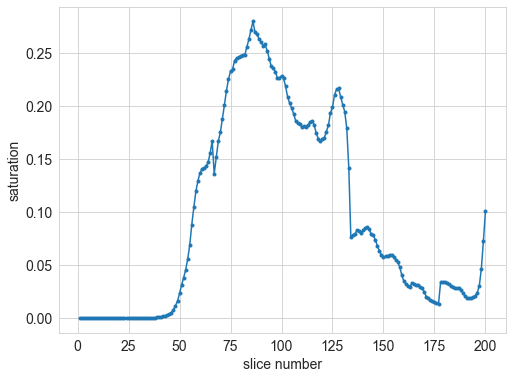

In [33]:
im_path = os.path.join(f_dir, fname)
im = imread(os.path.normpath(im_path))
sats = ig.tools.get_saturation(im, air_phase_val=air_phase_val, 
                              sat_phase_val=water_phase_val, ax=mea_axis)

slice_num = np.arange(len(sat))+1
slice_position = slice_num*pixel_size
# save data
data = pd.DataFrame({'slice-number':slice_num,
            'sauration': sats})

result_fname = 'saturation-data.csv'

data.to_csv(os.path.join(f_dir, result_fname), index=False)

# plot
fig, ax = plt.subplots()
ax.plot(slice_num, sat, '.-')
ax.set_ylabel('saturation');
ax.set_xlabel('slice number');